<a href="https://colab.research.google.com/github/yoonhyun123/practice/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and direc

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#데이터를 데이터프레임 형태로 읽어오기
df = pd.read_csv('기온.csv', encoding='cp949')
df.head(3)

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,108,서울,2022-01-01,-4.3,-10.2,710.0,2.3,1544
1,108,서울,2022-01-02,-1.3,-5.2,2356.0,3.0,1551
2,108,서울,2022-01-03,-1.9,-8.0,714.0,2.5,1542


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       364 non-null    float64
 5   최저기온 시각(hhmi)  364 non-null    float64
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


In [ ]:
df2 = df.fillna(method='ffill')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       365 non-null    float64
 5   최저기온 시각(hhmi)  365 non-null    float64
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


<ipython-input-5-832c29b78b3a>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2 = df.fillna(method='ffill')


In [ ]:
df2.rename(columns={'최저기온(°C)':'min_temp'}, inplace=True)
df2.rename(columns={'평균기온(°C)':'avg_temp'}, inplace=True)
df2.rename(columns={'최고기온(°C)':'max_temp'}, inplace=True)
df2.head(3)

,지점,지점명,일시,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
0,108,서울,2022-01-01,-4.3,-10.2,710.0,2.3,1544
1,108,서울,2022-01-02,-1.3,-5.2,2356.0,3.0,1551
2,108,서울,2022-01-03,-1.9,-8.0,714.0,2.5,1542


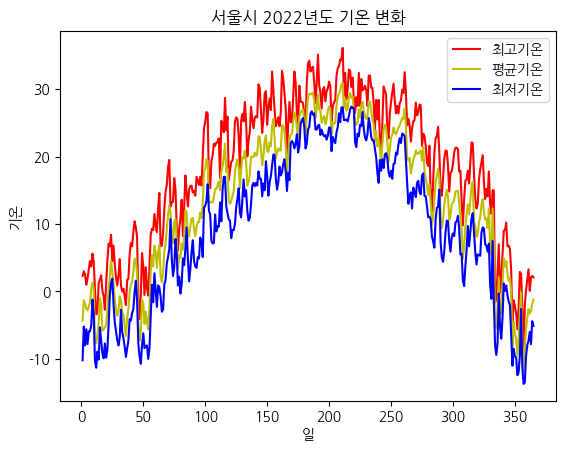

In [ ]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('서울시 2022년도 기온 변화')
plt.plot(range(1,len(df2)+1), df2['max_temp'], label='최고기온', c='r')
plt.plot(range(1,len(df2)+1), df2['avg_temp'], label='평균기온', c='y')
plt.plot(range(1,len(df2)+1), df2['min_temp'], label='최저기온', c='b')
plt.xlabel('일')
plt.ylabel('기온')
plt.legend()
plt.show()

In [ ]:
df2['일시'] = pd.to_datetime(df2['일시'], format='%Y-%m-%d')
df2['일시']

,일시
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
360,2022-12-27
361,2022-12-28
362,2022-12-29
363,2022-12-30


In [ ]:
df3 = df2.set_index('일시')
df3.head(3)

,지점,지점명,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
일시,,,,,,,
2022-01-01,108,서울,-4.3,-10.2,710.0,2.3,1544
2022-01-02,108,서울,-1.3,-5.2,2356.0,3.0,1551
2022-01-03,108,서울,-1.9,-8.0,714.0,2.5,1542


In [ ]:
df_Mar = df3[pd.DatetimeIndex(df3.index).month == 3]

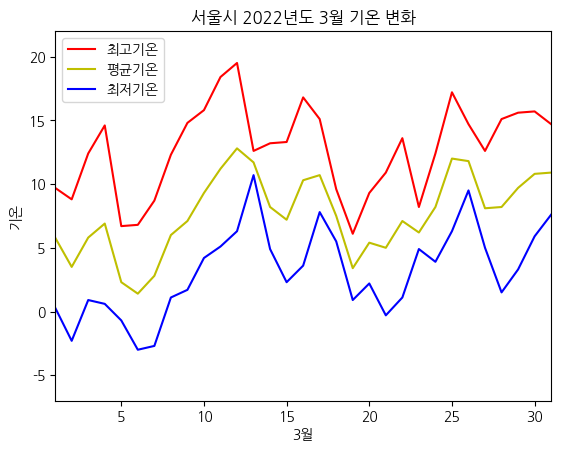

<Figure size 10000x20000 with 0 Axes>

In [ ]:
plt.title('서울시 2022년도 3월 기온 변화')
plt.plot(range(1,32), df_Mar['max_temp'], label='최고기온', c='r')
plt.plot(range(1,32), df_Mar['avg_temp'], label='평균기온', c='y')
plt.plot(range(1,32), df_Mar['min_temp'], label='최저기온', c='b')
plt.xlabel('3월')
plt.ylabel('기온')
plt.xlim(1,31)
plt.ylim(-7, 22)
plt.legend()
plt.rcParams['figure.figsize'] = (100, 200)
plt.show()
plt.savefig('서울.png')

In [ ]:
!pip install konlpy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 25.1 MB/s eta 0:00:00


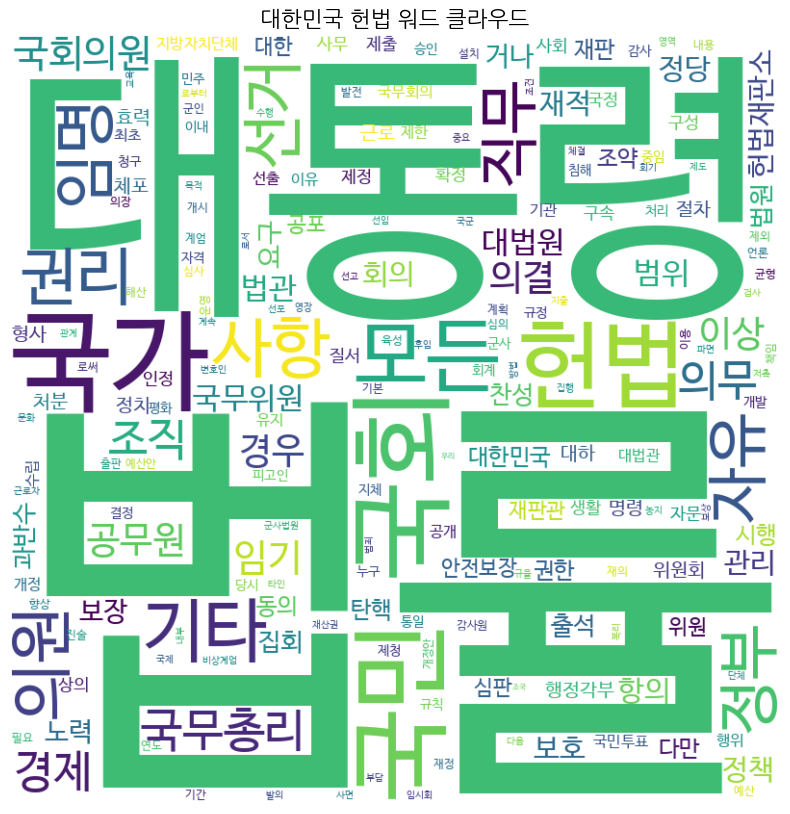

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter

# 텍스트 파일 읽기
with open('대한민국헌법.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 형태소 분석기(Okt)를 사용해 명사 추출
okt = Okt()
nouns = okt.nouns(text)

# 길이가 1 이상인 단어만 필터링
words = [n for n in nouns if len(n) > 1]

# 단어 빈도 계산
c = Counter(words)

# 워드 클라우드 생성
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',  # 한글 폰트 경로
    width=400,
    height=400,
    scale=2.0,
    max_font_size=250,
    background_color='white'
)

# 빈도수로 워드 클라우드 생성
gen = wc.generate_from_frequencies(c)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 10))
plt.imshow(gen, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.title('대한민국 헌법 워드 클라우드', fontsize=16)
plt.show()

# 워드 클라우드 이미지 파일로 저장
wc.to_file('헌법_워드클라우드.png')


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip install konlpy
!pip install networkx == 2.7.1

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import networkx as nx
from konlpy.tag import Hannanum
hannanum = Hannanum()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
f = open('News.csv', 'r', encoding='cp949')
lines = f.readlines()
print(lines)
f.close()

['[깨알지식 Q] 이슬람 문화권에선 왜 초승달 신성시하나\n', '이란이 구축한 ‘초승달 벨트’ 무너졌다\n', '시리아 국민 “수십년 억압서 자유 되찾아 불안정한 미래는 걱정”\n', '12연승 흥국생명 어디까지 오를까\n', '[사진] 돌아오는 시리아 난민들\n', '"아사드 대통령, 러시아로 망명 튀르키예 웃고, 이란 운다"\n', '산에 호랑이 없으면 전쟁 안 날까[임용한의 전쟁사]〈344〉\n', '‘뒷배’ 러시아로 도피한 알아사드 중동 권력 구도 재편 ‘각축전’\n', "우크라 가자 낙진 맞은 아사드 '반군 승리' 시리아의 '내일'은?\n", '‘몰락’ 아사드 일가 러시아로 시리아 급격 정권교체 중동 정세 변수\n', '[미리보는 이데일리 신문]수습 안되는 계엄 탄핵정국 시총 144조 날렸다\n', '"시리아 반군, \'53년 독재\' 끝내 중동 정세 소용돌이"\n', '"강원FC, 정경호 감독 선임 후 내년 시즌 기대감 증폭"\n', '시리아 권력 공백 속 ‘계산기’ 두드리는 내전 개입 열강들\n', '시리아 독재 정권 붕괴에 셈법 복잡한 국제사회\n', '"연말, 음주운전은 안 돼"\n', '정권 몰락 아사드 일가 러시아로 중동 정세 변화는\n', "'독재 정권 몰락' 13년 시리아 내전 끝났지만 중동 정세는 다시 출렁\n", '"""시리아의 봄 언급은 시기상조""... 알카에다 엮였던 반군에 앞날 혼란 예고"\n', "시리아 반군 승리에 러 이란 타격.. 튀르키예는 新오스만제국 '고삐'\n", '알아사드 러 망명 중동 권력지형 재편 예고\n', '"“시리아 정권 붕괴, 반군 일부 지지 튀르키예 최대 승자”"\n', '[오피니언] 디지털 시대에서 진실을 지키기 위한 투쟁\n', '"시리아 반군 승리에 웃는 튀르키예 이스라엘, 우는 이란 러시아, 왜?"\n', '시리아 반세기 철권 통치 종식  내전 개입 열강들 복잡한 셈법\n', '"대구디지털혁신진흥원, 디지털 혁신 기업 성과로 AI SW 도시로 도약"\n', '"시리아 대통령 망명 러시아 “어

In [5]:
dataset = []
for i in range(len(lines)):
    dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]', '', lines[i])))
dataset[:3]

[['깨알지식', '이슬람', '문화권', '초승달', '신성시하'],
 ['이란', '구축', '초승달', '벨트'],
 ['시리', '국민', '수십년', '억압', '자유', '불안정한', '미래', '걱정']]

In [16]:
!pip install apyori
import pandas as pd
from apyori import apriori

# 연관 규칙 데이터프레임 생성
result = list(apriori(dataset, min_support=0.01))
df = pd.DataFrame(result)

# 항목 수가 2인 것만 남기기
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) & (df['support'] >= 0.01)].sort_values(by='support', ascending=False)

# 상위 3개 데이터 출력
print(df.head(3))


         items   support                                 ordered_statistics  \
125   (시리, 반군)  0.036842  [((), (시리, 반군), 0.03684210526315789, 1.0), ((반...   
126  (시리아, 반군)  0.030526  [((), (시리아, 반군), 0.030526315789473683, 1.0), (...   
111  (내전, 시리아)  0.029474  [((), (내전, 시리아), 0.029473684210526315, 1.0), (...   

     length  
125       2  
126       2  
111       2  


In [17]:
!pip install scipy==1.8.0
!pip install pyg-nightly

In [21]:
pip install --upgrade scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 25.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.8.0
    Uninstalling scipy-1.8.0:
      Successfully uninstalled scipy-1.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [ ]:
!pip install scipy==1.8.0
!pip install networkx==2.7.1
!pip install pyg-nightly

  Using cached scipy-1.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
Using cached scipy-1.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (42.3 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.8.0 which is incompatible.
arviz 0.20.0 requires scipy>=1.9.0, but you have scipy 1.8.0 which is incompatible.
jax 0.4.33 requires scipy>=1.10, but you have scipy 1.8.0 which is incompatible.
jaxlib 0.4.33 requires scipy>=1.10, but you have scipy 1.8.0 which is incompatible.
scikit-image 0.24.0 requires scipy>=1.9, but you have scipy 1.8.0 which is incompatible.
xarray-einstats 0.8.0 requires scipy>=1.9, b

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: Operation cancelled by user


         items   support                                 ordered_statistics  \
125   (반군, 시리)  0.036842  [((), (반군, 시리), 0.03684210526315789, 1.0), ((반...   
126  (반군, 시리아)  0.030526  [((), (반군, 시리아), 0.030526315789473683, 1.0), (...   
111  (시리아, 내전)  0.029474  [((), (시리아, 내전), 0.029473684210526315, 1.0), (...   

     length  
125       2  
126       2  
111       2  


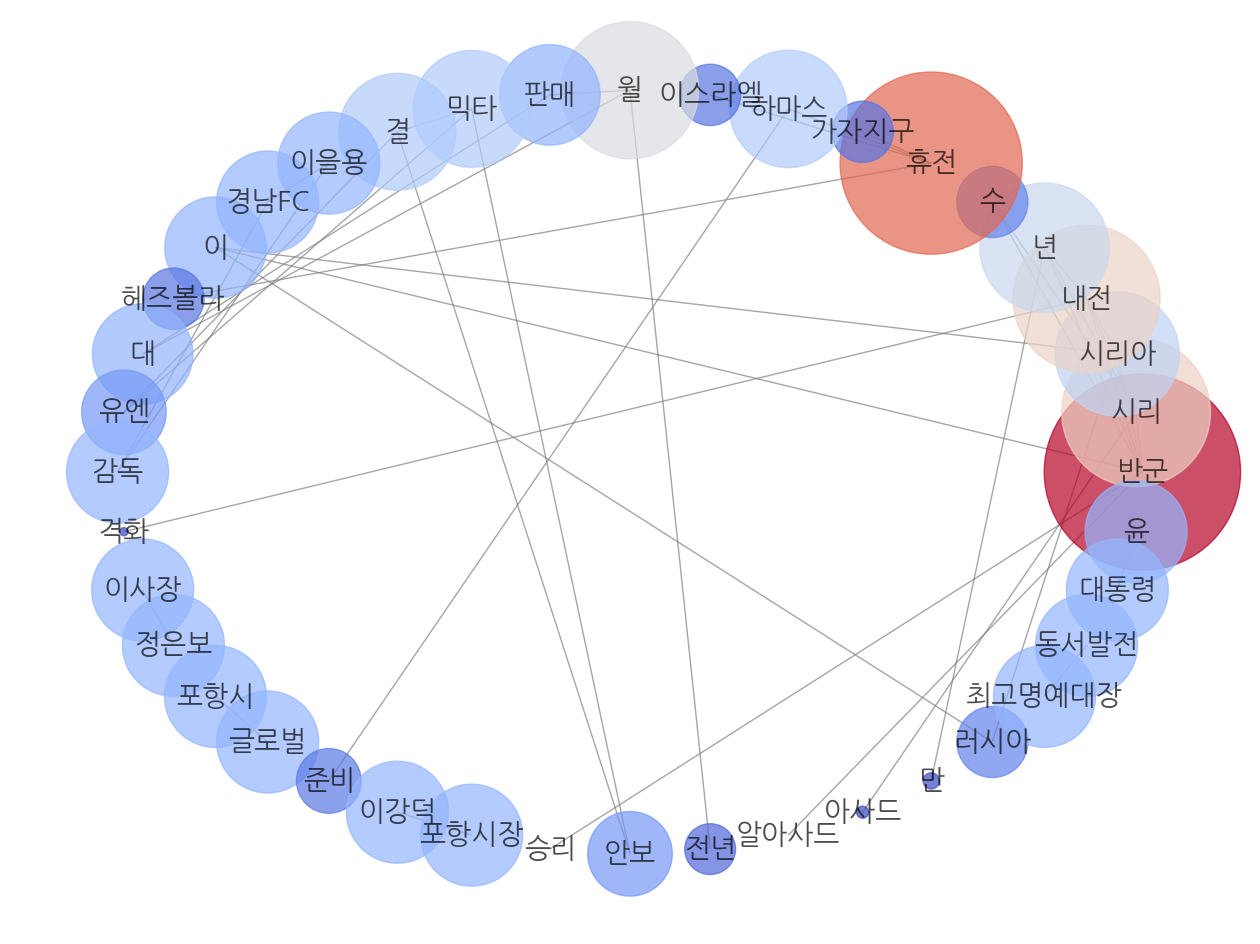

In [8]:
# ipython-input-7-5ec75c663cc7 셀 시작 부분에 추가
!pip install apyori
import pandas as pd
from apyori import apriori

# 연관 규칙 데이터프레임 생성
result = list(apriori(dataset, min_support=0.01))
df = pd.DataFrame(result)

# 항목 수가 2인 것만 남기기
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) & (df['support'] >= 0.01)].sort_values(by='support', ascending=False)

# 상위 3개 데이터 출력
print(df.head(3))

# 기존 ipython-input-7-5ec75c663cc7 셀의 코드
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import networkx as nx
from konlpy.tag import Hannanum
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize-min(nsize)) / (max(nsize)-min(nsize))
pos = nx.circular_layout(G)
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='NanumGothic', font_size=20, pos=pos,\
node_color=list(pr.values()), node_size=nsize*10, alpha=0.7,\
edge_color='.5', cmap=plt.cm.coolwarm)
plt.savefig('IMG.png', bbox_inches='tight')